In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

class Estimator():
    
    def __init__(self):
        # We create a separate model for each action in the environment's
        # action space. Alternatively we could somehow encode the action
        # into the features, but this way it's easier to code up.
        self.models = []
        for _ in range(actions):
            model = SGDRegressor(learning_rate="constant", eta0=0.001, penalty='l2')
            # We need to call partial_fit once to initialize the model
            # or we get a NotFittedError when trying to make a prediction
            # This is quite hacky.
            model.partial_fit([self.featurize_state(np.zeros(state_space))], [0])
            self.models.append(model)
        self.scaler = StandardScaler()
        self.scaler.fit([self.featurize_state(np.zeros(state_space))], [np.zeros(state_space)])
    
    def featurize_state(self, state):
        # Needs to return a 1D array
        if use_poly:
            state = int(state)
            return np.array([state**i for i in range(1, poly_degree+1)])
        else:
            return np.array(state)
    
    def predict(self, state):
        state_feature = self.featurize_state(state)
        state_feature = self.scaler.transform([state_feature]) # Returns a 2D array
        return np.array([m.predict(state_feature)[0] for m in self.models])
    
    def update(self, state, action, reward):
        model = self.models[action]
        state_feature = self.featurize_state(state)
        
        self.scaler.partial_fit([state_feature])
        state_feature = self.scaler.transform([state_feature]) # Returns a 2D array
        model.partial_fit(state_feature, [reward])
        
#         print("After update:", model.predict(state_feature)[0])

In [18]:
with open('SATLIB_50_action_penalty.pickle', 'rb') as fin:
    episode_reward_train, episode_length_train, estimator, episode_reward_test, episode_length_test, episode_reward_rand, episode_length_rand = pickle.load(fin)

In [27]:
state_space = 7
use_poly = False
actions = 6

d1 = np.linspace(0, 300, 301)
d2 = np.linspace(0, 3, 100)
d3 = np.linspace(0, 5, 100)
d4 = np.linspace(0, 1, 1000)
d5 = np.linspace(0, 1, 1000)
d6 = np.linspace(0, 1, 1000)
d7 = np.linspace(0, 1, 1000)

estimator.predict([d1[0], d2[0], d3[0], d4[0], d5[0], d6[0], d7[0]])

array([1.78416591, 1.76789418, 1.65123579, 1.79594478, 1.22168287,
       1.44013678])

<IPython.core.display.Javascript object>


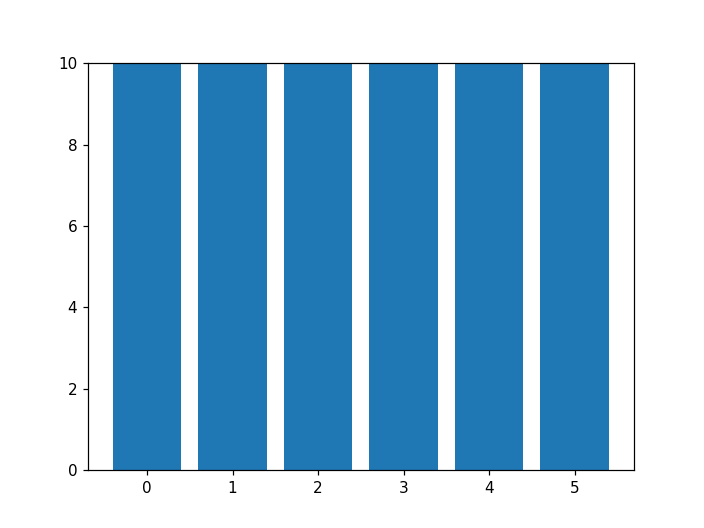

Action with highest reward: (index of array denotes action and value denotes how often it was highest)


array([   0,    0,    0, 1000])

In [56]:
# To see how much variance we get by changing one of the features

results = []
j = int(np.random.uniform(0, 100))
for i in d6:
    ans = estimator.predict([d1[j], d2[j], d3[j], d4[j], d5[j], i, d7[j]])
    results.append(ans)
    
results = np.array(results)
change = np.var(results, axis=0)

plt.bar(range(actions), change)
plt.ylim(0, 10)

# To see what the dominant action is by varying one of the features
print("Action with highest reward: (index of array denotes action and value denotes how often it was highest)")
np.bincount(np.argmax(results, axis=1))